In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from nltk.corpus import stopwords
import string
from bs4 import BeautifulSoup
import re
from nltk import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings('ignore')
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import accuracy_score, precision_score

In [2]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

print('Shape of the data is:', df.shape)
df.head()

Shape of the data is: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.duplicated().sum()

403

In [5]:
df = df.drop_duplicates()
print('Shape of the data after removing duplicates is:', df.shape)

Shape of the data after removing duplicates is: (5169, 5)


In [6]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis = 1)
df.sample(2)

,v1,v2
2364,ham,Ok then no need to tell me anything i am going...
1327,spam,Ur balance is now å£500. Ur next question is: ...


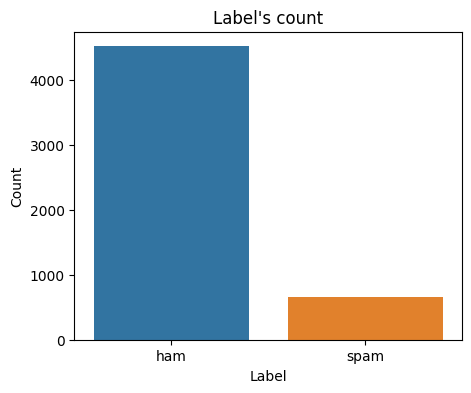

In [7]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'v1', data = df)
plt.xlabel('Label')
plt.title("Label's count")
plt.ylabel('Count')
plt.show()

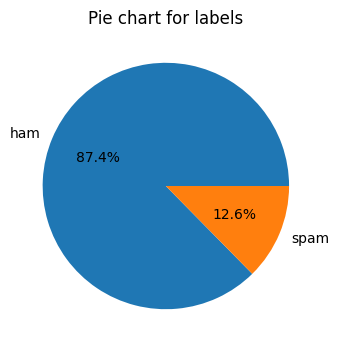

In [8]:
value = df['v1'].value_counts()
labels = value.index

plt.figure(figsize = (4,4))

plt.title('Pie chart for labels')
plt.pie(value, labels = labels, autopct = '%1.1f%%')

plt.show()

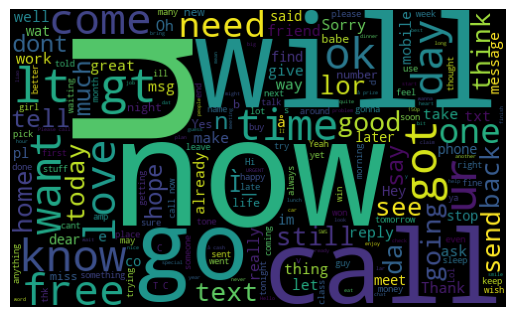

In [9]:
cloud = WordCloud(width = 500, height = 300, background_color = 'black').generate(''.join(df['v2']))
plt.axis('off')
plt.imshow(cloud)

In [10]:
df['len'] = df['v2'].apply(lambda x: len(x))
df.head()

,v1,v2,len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


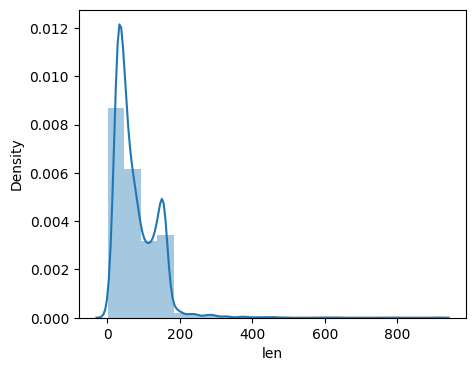

In [11]:
plt.figure(figsize = (5,4))

sns.distplot(df['len'], bins = 20)

plt.show()

In [12]:
df['v2']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: v2, Length: 5169, dtype: object

In [13]:
df['words'] = df['v2'].apply(word_tokenize)
df['words_count'] = df['words'].apply(lambda x: len(x))
df.head()

,v1,v2,len,words,words_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15


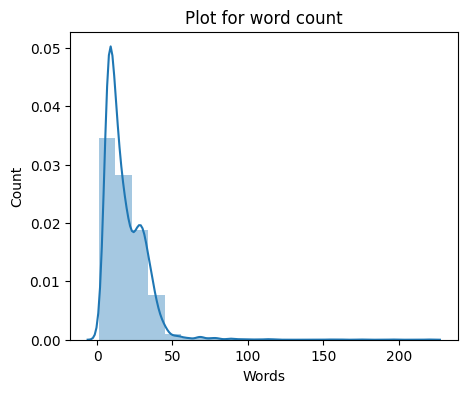

In [14]:
plt.figure(figsize = (5,4))

sns.distplot(df['words_count'], bins = 20)
plt.title('Plot for word count')
plt.xlabel('Words')
plt.ylabel('Count')

plt.show()

In [15]:
df['sentences'] = df['v2'].apply(sent_tokenize)
df['sentences_count'] = df['sentences'].apply(lambda x: len(x))
df.head()

,v1,v2,len,words,words_count,sentences,sentences_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,"[Go until jurong point, crazy.., Available onl...",2
1,ham,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,"[Ok lar..., Joking wif u oni...]",2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,[Free entry in 2 a wkly comp to win FA Cup fin...,2
3,ham,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,[U dun say so early hor... U c already then sa...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,"[Nah I don't think he goes to usf, he lives ar...",1


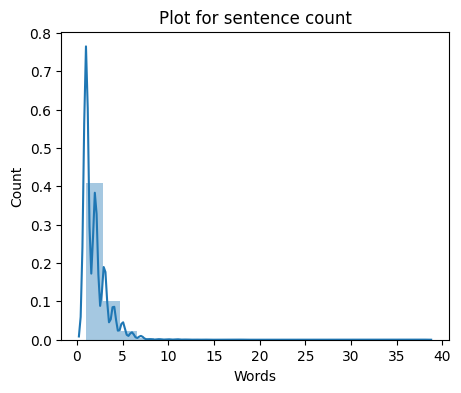

In [16]:
plt.figure(figsize = (5,4))

sns.distplot(df['sentences_count'], bins = 20)
plt.title('Plot for sentence count')
plt.xlabel('Words')
plt.ylabel('Count')

plt.show()

In [17]:
df.describe()

,len,words_count,sentences_count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [18]:
df[df['len'] == 910]

,v1,v2,len,words,words_count,sentences,sentences_count
1084,ham,For me the love should start with attraction.i...,910,"[For, me, the, love, should, start, with, attr...",175,[For me the love should start with attraction....,1


In [19]:
print(df[df['v1'] == 'ham'].describe(), '\n')
print(df[df['v1'] == 'spam'].describe())

               len  words_count  sentences_count
count  4516.000000  4516.000000      4516.000000
mean     70.459256    17.123782         1.820195
std      56.358207    13.493970         1.383657
min       2.000000     1.000000         1.000000
25%      34.000000     8.000000         1.000000
50%      52.000000    13.000000         1.000000
75%      90.000000    22.000000         2.000000
max     910.000000   220.000000        38.000000 

              len  words_count  sentences_count
count  653.000000   653.000000       653.000000
mean   137.891271    27.667688         2.970904
std     30.137753     7.008418         1.488425
min     13.000000     2.000000         1.000000
25%    132.000000    25.000000         2.000000
50%    149.000000    29.000000         3.000000
75%    157.000000    32.000000         4.000000
max    224.000000    46.000000         9.000000


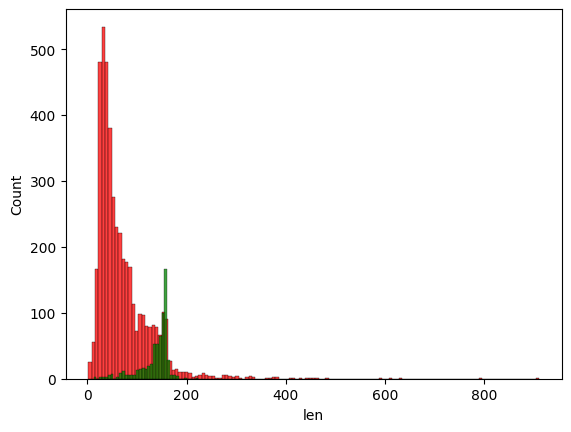

In [20]:
sns.histplot(df[df['v1'] == 'ham']['len'], color = 'r')
sns.histplot(df[df['v1'] == 'spam']['len'], color ='g')

plt.show()

In [21]:
df['v1'] = df['v1'].replace({'ham': 0, 'spam': 1})
df.head()

,v1,v2,len,words,words_count,sentences,sentences_count
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,"[Go until jurong point, crazy.., Available onl...",2
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,"[Ok lar..., Joking wif u oni...]",2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,[Free entry in 2 a wkly comp to win FA Cup fin...,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,[U dun say so early hor... U c already then sa...,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,"[Nah I don't think he goes to usf, he lives ar...",1


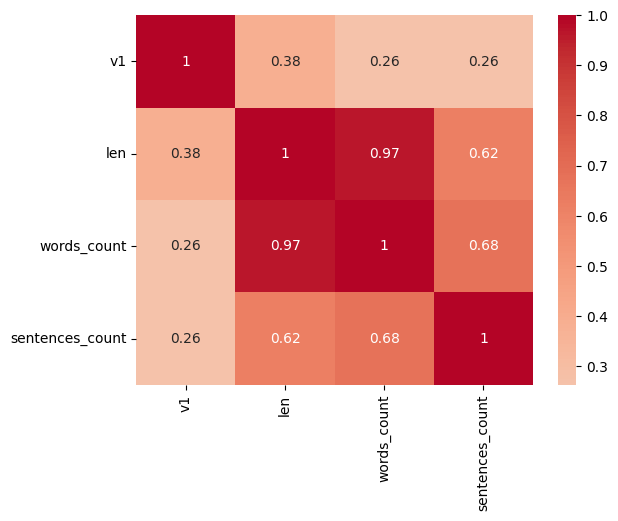

In [22]:
correlation = df.select_dtypes(include=['int64'])
correlation = correlation.corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm', center =0)
plt.show()

In [23]:
punc = string.punctuation
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
print(punc, stop_words)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ {'again', 'he', 'a', 'very', 'for', 'theirs', 'being', 'myself', 'having', 'yours', 'their', 'then', 'some', 'other', 'themselves', 'until', "you're", 'mustn', 'my', 'they', 'of', "should've", 'the', 'each', 'more', 'most', 'm', "you'd", 'but', 'we', 'by', 'had', 'off', 'while', "haven't", 'mightn', 'which', 'from', 'why', 'ourselves', 'through', 'not', "couldn't", 'all', "you'll", "that'll", 'himself', 'didn', 'how', 'ma', 'if', 'weren', 'was', 'can', 'is', 'after', 'up', 'will', 'aren', 'o', 'them', 'when', "needn't", 'shan', 'these', 'and', 'with', 'or', 'your', 'too', 'during', 'him', 'above', 'those', 'such', 'nor', "she's", 'at', 'on', 'herself', 'over', 'won', 'hers', 'she', 'so', 'itself', 'who', 'about', 'll', 'as', 'y', 'to', 'both', 'should', 'where', 'yourself', 'there', 'this', 'been', 'ain', 'few', 'has', 'did', 'what', 'between', 'here', 'whom', 'against', "mustn't", "shan't", 'our', 're', "wasn't", 'an', 'needn', 'shouldn', 'be', 've', '

In [24]:
msg = 'URBAN PLANET: TMRW! BOGO 50% OFF ABSOLUTELY EVERYTHING! DENIM, FLEECE, CARGO & MORE! BACK TO SCHOOL SALE ON NOW! Excl Apply https://rng.me/up Txt STOP to end'
print(msg)

URBAN PLANET: TMRW! BOGO 50% OFF ABSOLUTELY EVERYTHING! DENIM, FLEECE, CARGO & MORE! BACK TO SCHOOL SALE ON NOW! Excl Apply https://rng.me/up Txt STOP to end


In [25]:
msg = msg.lower()

soup = BeautifulSoup(msg, 'html.parser')
msg = soup.get_text(separator=' ')

msg = re.sub(r'http\S+', '', msg)

msg = [i for i in msg if i not in punc]
msg = ''.join(msg)
print(msg)
msg = word_tokenize(msg)
msg = [i for i in msg if i not in stop_words]
msg = ' '.join(msg)
print(msg)
msg = [stemmer.stem(i) for i in msg]
msg = ''.join(msg)
print(msg)

urban planet tmrw bogo 50 off absolutely everything denim fleece cargo  more back to school sale on now excl apply  txt stop to end
urban planet tmrw bogo 50 absolutely everything denim fleece cargo back school sale excl apply txt stop end
urban planet tmrw bogo 50 absolutely everything denim fleece cargo back school sale excl apply txt stop end


In [26]:
def clean(msg):
    msg = msg.lower()
    soup = BeautifulSoup(msg, 'html.parser')
    msg = soup.get_text(separator=' ')
    msg = re.sub(r'http\S+', '', msg)
    msg_punc = [i for i in msg if i not in punc]
    msg_punc = ''.join(msg_punc)
    msg = word_tokenize(msg_punc)
    msg_words = [i for i in msg if i not in stop_words]
    msg = ' '.join(msg_words)
    msg_stem = [stemmer.stem(i) for i in msg]
    msg = ''.join(msg_stem)
    return msg

In [27]:
df['messages'] = df['v2'].apply(clean)
df.head(10)

,v1,v2,len,words,words_count,sentences,sentences_count,messages
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",24,"[Go until jurong point, crazy.., Available onl...",2,go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",8,"[Ok lar..., Joking wif u oni...]",2,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",37,[Free entry in 2 a wkly comp to win FA Cup fin...,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",13,[U dun say so early hor... U c already then sa...,1,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",15,"[Nah I don't think he goes to usf, he lives ar...",1,nah dont think goes usf lives around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,"[FreeMsg, Hey, there, darling, it, 's, been, 3...",39,[FreeMsg Hey there darling it's been 3 week's ...,4,freemsg hey darling 3 weeks word back id like ...
6,0,Even my brother is not like to speak with me. ...,77,"[Even, my, brother, is, not, like, to, speak, ...",18,[Even my brother is not like to speak with me....,2,even brother like speak treat like aids patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,160,"[As, per, your, request, 'Melle, Melle, (, Oru...",31,[As per your request 'Melle Melle (Oru Minnami...,2,per request melle melle oru minnaminunginte nu...
8,1,WINNER!! As a valued network customer you have...,158,"[WINNER, !, !, As, a, valued, network, custome...",32,"[WINNER!!, As a valued network customer you ha...",5,winner valued network customer selected receiv...
9,1,Had your mobile 11 months or more? U R entitle...,154,"[Had, your, mobile, 11, months, or, more, ?, U...",31,"[Had your mobile 11 months or more?, U R entit...",3,mobile 11 months u r entitled update latest co...


In [28]:
df['target'] = df['v1']
df1 = df[['target','messages']]
df1.head()

,target,messages
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor u c already say
4,0,nah dont think goes usf lives around though


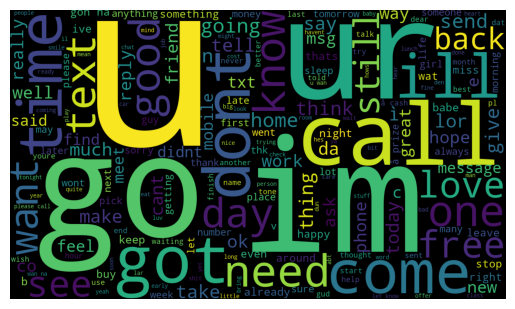

In [29]:
cloud = WordCloud(width = 1200, height = 700).generate(''.join(df1['messages']))
plt.imshow(cloud)
plt.axis('off')

plt.show()

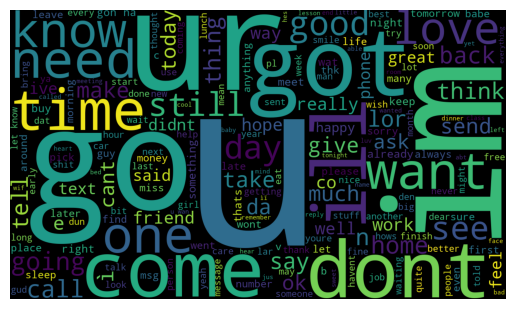

In [30]:
cloud = WordCloud(width = 1200, height = 700).generate(''.join(df1[df1['target']==0]['messages']))
plt.imshow(cloud)
plt.axis('off')

plt.show()

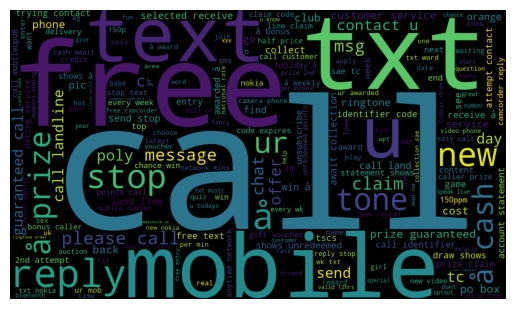

In [31]:
cloud = WordCloud(width = 1200, height = 700).generate(''.join(df1[df1['target']==1]['messages']))
plt.imshow(cloud)
plt.axis('off')

plt.show()

In [32]:
from collections import Counter

In [33]:
spam_corpus = []
for msg in df[df['target'] == 1]['messages'].tolist():
    for words in msg.split():
        spam_corpus.append(words)

In [34]:
words = Counter(spam_corpus)
len(spam_corpus)

10791

In [35]:
common = words.most_common(20)
print(common)

[('call', 303), ('free', 189), ('2', 155), ('txt', 126), ('u', 123), ('ur', 119), ('mobile', 105), ('text', 103), ('stop', 103), ('4', 97), ('claim', 96), ('reply', 93), ('prize', 81), ('get', 69), ('new', 64), ('urgent', 58), ('send', 57), ('nokia', 54), ('cash', 51), ('contact', 51)]


In [36]:
common_words = pd.DataFrame(common, columns = ['words','values'])
common_words.head(5)

,words,values
0,call,303
1,free,189
2,2,155
3,txt,126
4,u,123


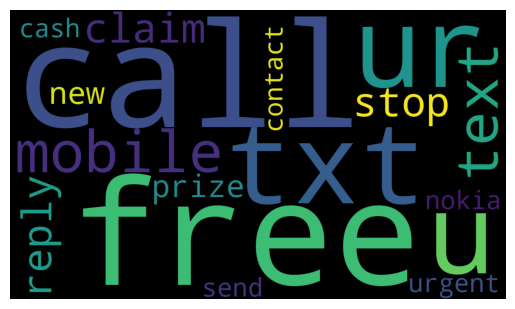

In [37]:
cloud = WordCloud(width = 1200, height = 700, background_color = 'black').generate(' '.join(common_words['words']))
plt.imshow(cloud)
plt.axis('off')
plt.show()

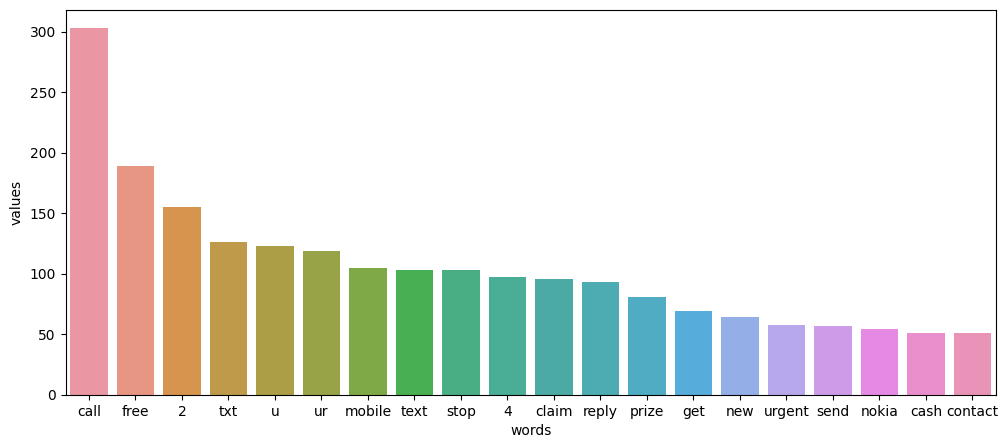

In [38]:
plt.figure(figsize = (12, 5))

sns.barplot(x = 'words', y = 'values', data = common_words)

plt.show()

In [39]:
vector = CountVectorizer()
tfidf = TfidfVectorizer(max_features= 2000)
scaler = MinMaxScaler()

x = vector.fit_transform(df1['messages'])
y = df1['target']
x = x.toarray()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 101)


X = tfidf.fit_transform(df1['messages'])
X = X.toarray()
Y = df1['target']
X = scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101)

In [40]:
log = LogisticRegression()
rfc = RandomForestClassifier(n_estimators = 100)
gbc = GradientBoostingClassifier(n_estimators= 100)
ad = AdaBoostClassifier(n_estimators= 100)
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC(kernel = 'sigmoid', gamma = 1.0)
xgb = XGBClassifier(n_estimators= 100)
mb = MultinomialNB()
gb = GaussianNB()

In [41]:
method = {
    'log': log,
    'rfc': rfc,
    'gbc': gbc,
    'ad': ad,
    'dt': dt,
    'knn': knn,
    'svm' : svm,
    'xgb': xgb,
    'mb': mb,
    'gb': gb
}

In [42]:
method.keys()

dict_keys(['log', 'rfc', 'gbc', 'ad', 'dt', 'knn', 'svm', 'xgb', 'mb', 'gb'])

In [43]:
def best_algo(method, x_train, y_train, x_test, y_test):
    method.fit(x_train, y_train)
    pred = method.predict(x_test)
    
    accuracy =  round(accuracy_score(y_test, pred) * 100, 2)
    
    return accuracy

In [44]:
best_algo(log, x_train, y_train, x_test, y_test)

96.42

In [45]:
method_name = []
accuracy = []

for classifier, model in method.items():
        
    acc = best_algo(model, x_train, y_train, x_test, y_test)
    accuracy.append(acc)
    method_name.append(classifier)

In [46]:
methods = pd.DataFrame({'model': method_name})
methods['accuracy'] = accuracy
methods

,model,accuracy
0,log,96.42
1,rfc,95.16
2,gbc,95.26
3,ad,96.23
4,dt,95.36
5,knn,88.68
6,svm,96.13
7,xgb,96.23
8,mb,97.58
9,gb,87.14


In [47]:
accuracy1 = []
method_name1 = []

for classifier, model in method.items():
        
    acc = best_algo(model, X_train, Y_train, X_test, Y_test)
    accuracy1.append(acc)
    method_name1.append(classifier)

In [48]:
print(method_name1)
print(accuracy1)

['log', 'rfc', 'gbc', 'ad', 'dt', 'knn', 'svm', 'xgb', 'mb', 'gb']
[96.23, 96.52, 94.97, 96.81, 94.29, 90.81, 96.32, 96.42, 98.16, 82.59]


In [49]:
methods1 = pd.DataFrame({'model': method_name})
methods1['accuracy_2000'] = accuracy1

final_accuracy = methods.merge(methods1, how = 'left', on = 'model')
final_accuracy

,model,accuracy,accuracy_2000
0,log,96.42,96.23
1,rfc,95.16,96.52
2,gbc,95.26,94.97
3,ad,96.23,96.81
4,dt,95.36,94.29
5,knn,88.68,90.81
6,svm,96.13,96.32
7,xgb,96.23,96.42
8,mb,97.58,98.16
9,gb,87.14,82.59


In [50]:
mb = MultinomialNB()
mb.fit(X_train, y_train)
pred = mb.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred))

Accuracy: 0.9816247582205029


In [51]:
import pickle
pickle.dump(tfidf, open('vector.pkl','wb'))
pickle.dump(mb, open('Algo.pkl','wb'))